In [1]:
import torch
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import plotnine as gg
from collections import defaultdict
from analysis import utils as au
from analysis import plotting
from data import utils as du
import seaborn as sns
import tree
from data import rosetta_data_loader

import sys
import argparse
import re
import logging

import pandas as pd
pd.set_option('display.max_colwidth', None)

from omegaconf import DictConfig, OmegaConf
import importlib

# Enable logging
import logging
import sys
date_strftime_format = "%Y-%m-%y %H:%M:%S"
logging.basicConfig(stream=sys.stdout, level=logging.INFO, format="%(asctime)s %(message)s", datefmt=date_strftime_format)

torch.hub.set_dir('/data/rsg/chemistry/jyim/.cache/torch')

INFO: Using numpy backend


In [2]:
src_dir = '/data/rsg/chemistry/jyim/projects/protein_diffusion/samples/unconditional_512_0/27D_11M_2022Y_09h_58m_16s/unconditional/13D_12M_2022Y_13h_43m_13s'
target_dir = '/data/rsg/chemistry/jyim/projects/protein_diffusion/samples/unconditional_512_0/27D_11M_2022Y_09h_58m_16s/unconditional/refold'

In [ ]:
# Move all final unconditional samples
for length_subdir in os.listdir(src_dir):
    if not 'length' in length_subdir:
        continue
    length = length_subdir.split('_')[1]
    length_dir = os.path.join(src_dir, length_subdir)
    for sample in os.listdir(length_dir):
        sample_id = sample.split('_')[1]
        file_path = os.path.join(length_dir, sample, 'sde_1.pdb')
        new_filename = f'length_{length}_{sample_id}.pdb'
        write_path = os.path.join(target_dir, new_filename)
        shutil.copy(file_path, write_path)

In [6]:
from data import utils as du
import esm
from analysis import metrics
import subprocess
from biotite.sequence.io import fasta

PATH_TO_MPNN = '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN'
folding_model = esm.pretrained.esmfold_v1().eval()
folding_model = folding_model.to('cuda:1')

In [18]:
for sample_file in os.listdir(target_dir):
    sample_path = os.path.join(target_dir, sample_file)
    if os.path.isdir(sample_path):
        continue
    sample_dir = sample_path.replace('.pdb', '')
    os.makedirs(sample_dir, exist_ok=True)
    write_path = os.path.join(sample_dir, sample_file)
    shutil.copy(sample_path, write_path)
    print(f'SC on {sample_file}')
    run_self_consistency(sample_dir, write_path)
    print(f'Done with {sample_file}')

SC on length_350_1.pdb


fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
discarded {'bad_chars': 0, 'too_long': 0, 'bad_seq_length': 0}
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: length_350_1
100 sequences of length 350 generated in 70.2126 seconds
Done with length_350_1.pdb
SC on length_455_6.pdb


fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
discarded {'bad_chars': 0, 'too_long': 0, 'bad_seq_length': 0}
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: length_455_6
100 sequences of length 455 generated in 98.1782 seconds
----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
---------------------------------------

fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
discarded {'bad_chars': 0, 'too_long': 0, 'bad_seq_length': 0}
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: length_315_2
100 sequences of length 315 generated in 144.4467 seconds
Done with length_315_2.pdb
SC on length_500_0.pdb


fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
discarded {'bad_chars': 0, 'too_long': 0, 'bad_seq_length': 0}
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: length_410_5
100 sequences of length 410 generated in 451.7994 seconds
Done with length_460_9.pdb
SC on length_205_0.pdb


fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
discarded {'bad_chars': 0, 'too_long': 0, 'bad_seq_length': 0}
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: length_205_0
100 sequences of length 205 generated in 79.6708 seconds
Done with length_205_0.pdb
SC on length_410_2.pdb


fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
discarded {'bad_chars': 0, 'too_long': 0, 'bad_seq_length': 0}
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: length_410_2
100 sequences of length 410 generated in 419.757 seconds
Done with length_410_2.pdb
SC on length_145_4.pdb


fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
discarded {'bad_chars': 0, 'too_long': 0, 'bad_seq_length': 0}
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: length_145_4
100 sequences of length 145 generated in 173.0017 seconds
Done with length_145_4.pdb
SC on length_70_8.pdb


fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
discarded {'bad_chars': 0, 'too_long': 0, 'bad_seq_length': 0}
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: length_70_8
100 sequences of length 70 generated in 39.2134 seconds
Done with length_70_8.pdb
SC on length_350_6.pdb


fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
discarded {'bad_chars': 0, 'too_long': 0, 'bad_seq_length': 0}
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: length_350_6
100 sequences of length 350 generated in 129.7548 seconds
Done with length_350_6.pdb
SC on length_455_1.pdb


fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


Done with length_455_1.pdb
SC on length_240_3.pdb


fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
discarded {'bad_chars': 0, 'too_long': 0, 'bad_seq_length': 0}
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: length_240_3
100 sequences of length 240 generated in 282.5919 seconds
Done with length_240_3.pdb
SC on length_230_8.pdb


fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
discarded {'bad_chars': 0, 'too_long': 0, 'bad_seq_length': 0}
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: length_230_8
100 sequences of length 230 generated in 264.5345 seconds
Done with length_230_8.pdb
SC on length_95_9.pdb


fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
discarded {'bad_chars': 0, 'too_long': 0, 'bad_seq_length': 0}
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: length_95_9
100 sequences of length 95 generated in 111.643 seconds
Done with length_95_9.pdb
SC on length_100_7.pdb


fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
discarded {'bad_chars': 0, 'too_long': 0, 'bad_seq_length': 0}
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: length_100_7
100 sequences of length 100 generated in 113.5783 seconds
Done with length_100_7.pdb
SC on length_485_8.pdb


fatal: not a git repository: '/data/rsg/chemistry/jyim/projects/protein_diffusion/ProteinMPNN/.git'


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
discarded {'bad_chars': 0, 'too_long': 0, 'bad_seq_length': 0}
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: length_485_8
100 sequences of length 485 generated in 553.5956 seconds


KeyboardInterrupt: 

In [7]:
def run_folding(sequence, save_path):
    """Run ESMFold on sequence."""
    with torch.no_grad():
        output = folding_model.infer_pdb(sequence)

    with open(save_path, "w") as f:
        f.write(output)
    return output

def run_self_consistency(decoy_pdb_dir: str, reference_pdb_path: str):

    # Run PorteinMPNN
    output_path = os.path.join(decoy_pdb_dir, "parsed_pdbs.jsonl")
    process = subprocess.Popen([
        'python',
        f'{PATH_TO_MPNN}/helper_scripts/parse_multiple_chains.py',
        f'--input_path={decoy_pdb_dir}',
        f'--output_path={output_path}',
    ])
    _ = process.wait()
    process = subprocess.Popen([
        'python',
        f'{PATH_TO_MPNN}/protein_mpnn_run.py',
        '--out_folder',
        decoy_pdb_dir,
        '--jsonl_path',
        output_path,
        '--num_seq_per_target',
        '100',
        '--sampling_temp',
        '0.1',
        '--seed',
        '38',
        '--batch_size',
        '1',
    ])
    _ = process.wait()
    mpnn_fasta_path = os.path.join(
        decoy_pdb_dir,
        'seqs',
        os.path.basename(reference_pdb_path).replace('.pdb', '.fa')
    )

    # Run ESMFold on each ProteinMPNN sequence and calculate metrics.
    mpnn_results = {
        'tm_score': [],
        'sample_path': [],
        'header': [],
        'sequence': [],
        'rmsd': [],
    }
    esmf_dir = os.path.join(decoy_pdb_dir, 'esmf')
    os.makedirs(esmf_dir, exist_ok=True)
    fasta_seqs = fasta.FastaFile.read(mpnn_fasta_path)
    sample_feats = du.parse_pdb_feats('sample', reference_pdb_path)
    for i, (header, string) in enumerate(fasta_seqs.items()):

        # Run ESMFold
        esmf_sample_path = os.path.join(esmf_dir, f'sample_{i}.pdb')
        _ = run_folding(string, esmf_sample_path)
        esmf_feats = du.parse_pdb_feats('folded_sample', esmf_sample_path)
        sample_seq = du.aatype_to_seq(sample_feats['aatype'])

        # Calculate scTM of ESMFold outputs with reference protein
        _, tm_score = metrics.calc_tm_score(
            sample_feats['bb_positions'], esmf_feats['bb_positions'],
            sample_seq, sample_seq)
        rmsd = metrics.calc_aligned_rmsd(
            sample_feats['bb_positions'], esmf_feats['bb_positions'])
        mpnn_results['rmsd'].append(rmsd)
        mpnn_results['tm_score'].append(tm_score)
        mpnn_results['sample_path'].append(esmf_sample_path)
        mpnn_results['header'].append(header)
        mpnn_results['sequence'].append(string)

    # Save results to CSV
    csv_path = os.path.join(decoy_pdb_dir, 'sc_results.csv')
    mpnn_results = pd.DataFrame(mpnn_results)
    mpnn_results.to_csv(csv_path)

In [59]:
# Paths
base_dir = '/data/rsg/chemistry/jyim/paper/protdiff_icml/unconditional_results_2'
samples_dir = os.path.join(base_dir, 'samples')
sample_cluster_dir = os.path.join(base_dir, 'sample_clustering')
figure_dir = os.path.join(base_dir, 'figures')
train_align_dir = os.path.join(base_dir, 'train_align')
train_pdbs_dir = os.path.join(base_dir, 'training_pdbs')


base_protdiff_dir = '/data/rsg/chemistry/jyim/projects/protein_diffusion/'

os.makedirs(base_dir, exist_ok=True)

if len(os.listdir(base_dir)):
    raise ValueError('WARNING: overwriting results!')

# Read unconditional sampling results

In [60]:
all_csvs = []
results_dir = os.path.join(
    base_protdiff_dir,
    '/data/rsg/chemistry/jyim/projects/protein_diffusion/samples/unconditional_512_0/27D_11M_2022Y_09h_58m_16s/unconditional/13D_12M_2022Y_13h_43m_13s'
    # 'samples/unconditional_schedule_sweep_2/21D_11M_2022Y_23h_28m_37s/unconditional/24D_11M_2022Y_14h_44m_26s'
    # 'samples/unconditional_schedule_sweep_3/21D_11M_2022Y_23h_28m_36s/unconditional/24D_11M_2022Y_20h_24m_16s'

    # 'samples/no_seq_diff_1/13D_11M_2022Y_18h_13m_02s/unconditional/19D_11M_2022Y_21h_18m_58s'
    # 'samples/unconditional_len_512_0/20D_11M_2022Y_15h_50m_01s/unconditional/23D_11M_2022Y_17h_16m_34s'
    # 'samples/unconditional_len_512_no_loop_filter_no_rog_0/20D_11M_2022Y_16h_06m_42s/unconditional/23D_11M_2022Y_09h_23m_35s'
    # 'samples/unconditional_schedule_sweep_0/21D_11M_2022Y_23h_28m_37s/unconditional/23D_11M_2022Y_11h_16m_25s'
    # 'samples/unconditional_schedule_sweep_1/21D_11M_2022Y_23h_28m_36s/unconditional/23D_11M_2022Y_11h_16m_26s'
    # 'samples/hallucination_dist_loss_exp_norm_0/13D_11M_2022Y_14h_16m_17s/unconditional/15D_11M_2022Y_13h_02m_17s'
)
print(f'Reading samples from {results_dir}')
for sample_length in os.listdir(results_dir):
    if '.' in sample_length:
        continue
    length_dir = os.path.join(results_dir, sample_length)
    for i,sample_name in enumerate(os.listdir(length_dir)):
        if '.' in sample_name:
            continue
        csv_path = os.path.join(length_dir, sample_name, 'mpnn', 'mpnn_results.csv')
        if not os.path.exists(csv_path):
            csv_path = os.path.join(length_dir, sample_name, 'mpnn', 'sc_results.csv')
        if os.path.exists(csv_path):
            design_csv = pd.read_csv(csv_path, index_col=0)
            design_csv['length'] = int(sample_length.split('_')[1])
            design_csv['sample_id'] = i
            all_csvs.append(design_csv)
results_df = pd.concat(all_csvs)

Reading samples from /data/rsg/chemistry/jyim/projects/protein_diffusion/samples/unconditional_512_0/27D_11M_2022Y_09h_58m_16s/unconditional/13D_12M_2022Y_13h_43m_13s


# Plot TM-score and success rate across length groups

In [61]:
# Process sample path
def pick_path(x):
    if x.sample_path is None or x.sample_path == '':
        return x.of_path
    return x.sample_path
results_df['sample_path'] = results_df['sample_path'].fillna('')
results_df['sample_path'] = results_df.apply(pick_path, axis=1)

In [62]:
# Separate based on whether MPNNed
results_df['header'] = results_df['header'].fillna('')
results_df['Post-ProteinMPNN'] = results_df['header'].map(lambda x: 'sde_1' not in x)

# Whether to only use MPNNed designs or not
results_df = results_df[results_df['Post-ProteinMPNN']]

In [73]:
# Gather top TM-score for each length and sample in each length
hallucination_sc_df = results_df.sort_values('rmsd', ascending=True)
hallucination_sc_df = hallucination_sc_df.groupby(['length', 'sample_id', 'Post-ProteinMPNN']).first().reset_index()

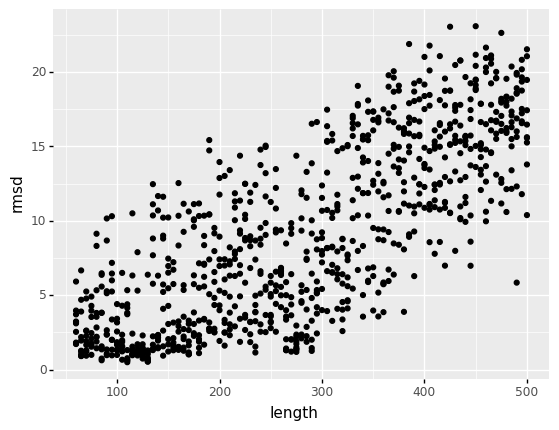

In [64]:
# Plot
p = (
    gg.ggplot(
        hallucination_sc_df,
        gg.aes('length', 'rmsd')
    )
    + gg.geom_point()
)

print(p)

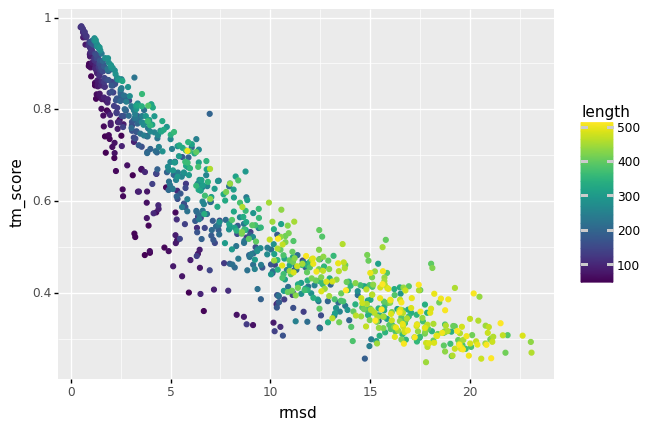

In [65]:
# Plot
p = (
    gg.ggplot(
        hallucination_sc_df,
        gg.aes('rmsd', 'tm_score', color='length')
    )
    + gg.geom_point()
)

print(p)

In [79]:
hallucination_sc_df = hallucination_sc_df[hallucination_sc_df.length > 100]

In [80]:
# Separate into different length groups
length_categories = [
    '1-100', '100-200', '200-300', '300-400', '400-500'
][::-1]
buckets = np.arange(0, 501, 100)
hallucination_sc_df['length_group'] = hallucination_sc_df.length.map(lambda x: length_categories[np.sum(x < buckets).item()-1])
hallucination_sc_df['length_group'] = pd.Categorical(hallucination_sc_df['length_group'], ordered=True, categories=length_categories[::-1])

/tmp/ipykernel_110590/2887132346.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_110590/2887132346.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [81]:
# Calculate how designable
cutoff = 0.5
hallucination_sc_df['designable'] = hallucination_sc_df.tm_score.map(lambda x: x > cutoff)
designable_df = pd.pivot_table(hallucination_sc_df, values='designable', index='length_group', aggfunc=np.mean).reset_index()

/tmp/ipykernel_110590/2566266071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [82]:
hallucination_sc_df['designable'].mean()

0.505

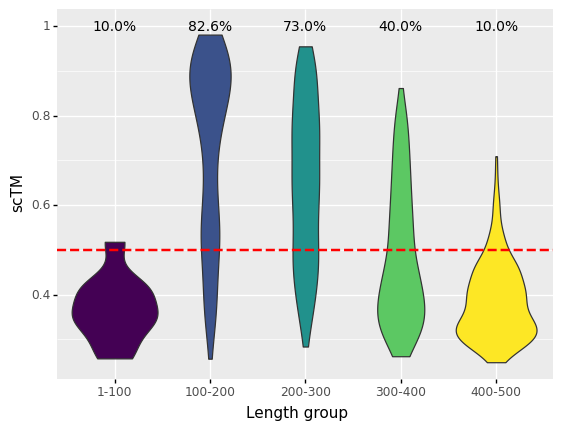

In [84]:
# Plot
p = (
    gg.ggplot(
        hallucination_sc_df,
        gg.aes('length_group', 'tm_score', fill='length_group')
    )
    + gg.geom_violin(
        show_legend=False
    )
    # + gg.facet_wrap('mpnn')
    + gg.geoms.geom_hline(
        yintercept=cutoff,
        size=1.0,
        linetype='dashed',
        color='red',
    )
    + gg.labels.ylab('scTM')
    + gg.labels.xlab('Length group')
    # + gg.labels.ggtitle('Unconditional generation')
)

for _, row in designable_df.iterrows():
    p += gg.annotate(
        "text",
        label = f"{row.designable*100:2.1f}%",
        x=row.length_group,
        y = 1.0,
        size = 10,
        colour = "black"
    )

print(p)

In [ ]:
# Save out the figure
fig_path = os.path.join(figure_dir, 'unconditional_sctm.png')
p.save(filename=fig_path, dpi=300)

In [12]:
# Save all designable hallucination samples
designable_samples_df = hallucination_sc_df[hallucination_sc_df.designable]
# if os.path.isdir(all_samples_path):
#     shutil.rmtree(samples_path)
# os.makedirs(samples_path, exist_ok=True)
fname = os.path.join(samples_dir, 'sc_pdbs.txt')
with open(fname, 'w') as f:
    for _, row in designable_samples_df.iterrows():
        sample_path = row.sample_path
        full_path = os.path.join(base_protdiff_dir, sample_path)
        if 'hallucination/0' not in sample_path:
            full_path = full_path.replace('hallucination', 'hallucination/0')
        file_name = f'length_{str(row.length)}_id_{str(row.sample_id)}.pdb'
        save_path = os.path.join(samples_dir, file_name)
        shutil.copy(full_path, save_path)
        f.write(save_path+'\n')

# Clustering analysis

In [29]:
file = os.path.join(sample_cluster_dir, 'all_by_all_lite')
with open(file, 'r') as f:
    text = f.read()
    
    size = re.findall(r'SIZE :(.*\d+)', text)[0]
    size = int(size)
    
    id_to_filename = {}
    D = np.ones((size,size))
    for line in text.splitlines():
        if line[:3] == 'PDB':
            _, id_, filename = line.split()
            id_ = int(id_)
            id_to_filename[id_] = filename
        elif line[:2] == 'MS':
            _, _, idx1, idx2, tm1, tm2, pairs = line.split()
            i, j = int(idx1)-1, int(idx2)-1
            tm1, tm2 = float(tm1), float(tm2)
            tm_mean = (tm1 + tm2) / 2
            D[i, j] = 1 - tm1
            D[j, i] = 1 - tm2
D_mean = (D + D.T) / 2
    

In [30]:
plt.figure(figsize=(2,2))
g = sns.clustermap(
    D_mean,
    method='average',
    figsize=(10,10),
    yticklabels=False,
    xticklabels=False,
    cbar_pos=(0.1, 0.02, 0.05, 0.75)
)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
plt.savefig(os.path.join(figure_dir, 'unconditional_sample_clustering.png'))

/data/rsg/chemistry/jyim/miniconda3/envs/dev/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
/data/rsg/chemistry/jyim/miniconda3/envs/dev/lib/python3.8/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


# Align samples to training PDBs

### Save traiing PDBs

In [ ]:
def int_to_chain(i,base=62):
    """
    int_to_chain(int,int) -> str
    Converts a positive integer to a chain ID. Chain IDs include uppercase
    characters, numbers, and optionally lowercase letters.
    i = a positive integer to convert
    base = the alphabet size to include. Typically 36 or 62.
    """
    if i < 0:
        raise ValueError("positive integers only")
    if base < 0 or 62 < base:
        raise ValueError("Invalid base")

    quot = int(i)//base
    rem = i%base
    if rem < 26:
        letter = chr( ord("A") + rem)
    elif rem < 36:
        letter = str( rem-26)
    else:
        letter = chr( ord("a") + rem - 36)
    if quot == 0:
        return letter
    else:
        return int_to_chain(quot-1,base) + letter

class OutOfChainsError(Exception): pass
def rename_chains(structure):
    """Renames chains to be one-letter chains
    
    Existing one-letter chains will be kept. Multi-letter chains will be truncated
    or renamed to the next available letter of the alphabet.
    
    If more than 62 chains are present in the structure, raises an OutOfChainsError
    
    Returns a map between new and old chain IDs, as well as modifying the input structure
    """
    next_chain = 0 #
    # single-letters stay the same
    chainmap = {c.id:c.id for c in structure.get_chains() if len(c.id) == 1}
    for o in structure.get_chains():
        if len(o.id) != 1:
            if o.id[0] not in chainmap:
                chainmap[o.id[0]] = o.id
                o.id = o.id[0]
            else:
                c = int_to_chain(next_chain)
                while c in chainmap:
                    next_chain += 1
                    c = int_to_chain(next_chain)
                    if next_chain >= 62:
                        raise OutOfChainsError()
                chainmap[c] = o.id
                o.id = c
    return chainmap

def cif_to_pdb(cif_path, pdb_path):
    #Not sure why biopython needs this to read a cif file
    strucid = cif_path[:4] if len(cif_path)>4 else "1xxx"

    # Read file
    parser = MMCIFParser()
    structure = parser.get_structure(strucid, cif_path)
    
    # rename long chains
    try:
        chainmap = rename_chains(structure)
    except OutOfChainsError:
        logging.error("Too many chains to represent in PDB format")
        sys.exit(1)

    #Write PDB
    io = PDBIO()
    io.set_structure(structure)
    #TODO What happens with large structures?
    io.save(pdb_path)

In [ ]:
# Create fake experiment with the data setting used for the checkpoint experiment.
conf = OmegaConf.load('../config/base.yaml')

# Redirect cache from notebook directory.
exp_conf = conf.experiment
exp_conf.data_location = 'rosetta'
exp_conf.ckpt_dir = None
exp_conf.num_loader_workers = 0
exp_conf.dist_mode = 'single'
exp_conf.use_wandb = False

# Data settings
data_conf = conf.data

# Create experiment object to extract training CSV.
exp = train_se3_diffusion.Experiment(conf=conf)
train_loader, valid_loader, _ = exp.create_rosetta_dataset(0, 1)
train_csv = train_loader.dataset.csv

# Save all training examples to PDB
train_pdbs_list = os.path.join(train_align_dir, 'train_pdbs.txt')
with open(train_pdbs_list, 'w') as f:
    for cif_path in train_csv.raw_path.tolist():
        pdb_path = os.path.join(save_dir, os.path.basename(cif_path)).replace('.cif', '.pdb')
        if not os.path.exists(pdb_path):
            cif_to_pdb(cif_path, pdb_path)
        f.write(pdb_path+'\n')
        
# Go outside of notebook and create database.

### Read alignments

In [13]:
def process_lines(line):
    cleaned_lines = line.replace('\n', '')
    pdb_name, tm_score = cleaned_lines.split(' ')
    return pdb_name, float(tm_score)

In [14]:
all_results = defaultdict(list)
for x in os.listdir(train_align_dir):
    output_path = os.path.join(train_align_dir, x)
    if 'tar' in output_path:
        continue
    with open(output_path) as f:
        for i,line in enumerate(f):
            try:
                l = process_lines(line)
                all_results[x].append(l)
            except Exception as e:
                continue

In [15]:
subset_df = hallucination_sc_df[hallucination_sc_df.tm_score > 0.5]

In [16]:
alignment_df = {
    'length': [],
    'sample_id': [],
    'top_hit': [],
    'top_hit_score': []
}
for example_id, example_alignments in all_results.items():
    length = int(example_id.split('_')[1])
    sample_id = int(example_id.split('_')[-1])
    alignment_df['length'].append(length)
    alignment_df['sample_id'].append(sample_id)
    top_hit, top_hit_score = example_alignments[0]
    alignment_df['top_hit'].append(top_hit)
    alignment_df['top_hit_score'].append(top_hit_score)
alignment_df = pd.DataFrame(alignment_df)

In [17]:
aligned_df = subset_df.merge(alignment_df, on=['length', 'sample_id'])

/data/rsg/chemistry/jyim/miniconda3/envs/dev/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


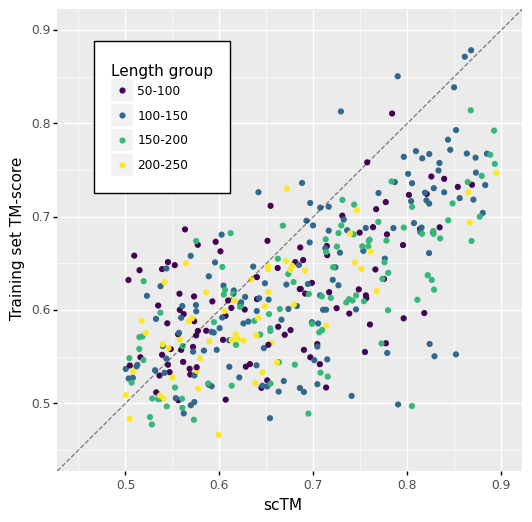

In [18]:
# Plot
p = (
    gg.ggplot(
        aligned_df,
        gg.aes('tm_score', 'top_hit_score', color='length_group')
    )
    + gg.geom_point()
    + gg.labels.xlab('scTM')
    + gg.labels.ylab('Training set TM-score')
    + gg.labels.labs(color='Length group')
    + gg.scales.ylim(0.45, 0.90)
    + gg.scales.xlim(0.45, 0.90)
    + gg.themes.theme(
        figure_size=(6, 6),
        legend_position=(0.3, 0.7),
        legend_background=gg.themes.element_rect(fill='white', color='black')
    )
    + gg.geom_abline(
        gg.aes(intercept=0.0, slope=1.0),
        linetype='dashed',
        alpha=0.5
    )
)

print(p)

In [20]:
# Save out the figure
fig_path = os.path.join(figure_dir, 'unconditional_training_set_comparison.png')
p.save(filename=fig_path, dpi=300)

/data/rsg/chemistry/jyim/miniconda3/envs/dev/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 6 in image.
/data/rsg/chemistry/jyim/miniconda3/envs/dev/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /data/rsg/chemistry/jyim/paper/protdiff_icml/unconditional_results/figures/unconditional_training_set_comparison.png
/data/rsg/chemistry/jyim/miniconda3/envs/dev/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


In [21]:
# Look at the most novel folds.
# aligned_df.sort_values('tm_score', ascending=False).sort_values('top_hit_score', ascending=True).head(20)
aligned_df.sort_values('top_hit_score', ascending=True).head(20)

,length,sample_id,Post-ProteinMPNN,tm_score,sample_path,header,sequence,of_path,length_group,designable,top_hit,top_hit_score
383,234,7,True,0.599163,samples/sweep_2/24D_10M_2022Y_16h_25m_04s/hallucination/0/length_234/sample_9/mpnn/esmf/sample_6.pdb,"T=0.1, sample=6, score=1.1060, global_score=1.1060, seq_recovery=0.1325",PPGVGPPVPCPGCGIGLGAPPAPGVCYGLPEFFTGPCGATDTVAGGAAGGDAVLAVARAHAPDPGGWKLGRRPVWTLDAGGLLRGLFREHLGAPEALAELRRALEAVRRERAEEWPPLTEEELLRELLVVVVRGEITEPARRAVEALAEAAGLPPEEALAAVREVVEGGSGVTGRPPWADWEIVYLKPPPGPGGPPDPPAGELLGLRGRGPDGEGLGVAVVSRDGGPGTAVLLE,None,200-250,True,6s8b_K,0.46644
280,166,8,True,0.528121,samples/sweep_2/24D_10M_2022Y_16h_25m_04s/hallucination/0/length_166/sample_0/mpnn/esmf/sample_4.pdb,"T=0.1, sample=4, score=1.0961, global_score=1.0961, seq_recovery=0.1265",GARWVEHPHGFKLFVLVPGAGPAGGVIFVRLGEPDPEEKVGLVKGGGVPLTDEGAEAILGERFGKAAAPELEKALKGGLVLIPGPDVPPEVLGAVGPGEPTPFARALRKAADGTPVTAEELLAPNPLDPEGQKLYAGGGKLIDKVYFIGGSPELAAEILAAAGAEP,None,150-200,True,5g5g_C,0.47741
255,156,8,True,0.572834,samples/sweep_2/24D_10M_2022Y_16h_25m_04s/hallucination/0/length_156/sample_7/mpnn/esmf/sample_6.pdb,"T=0.1, sample=6, score=1.2523, global_score=1.2523, seq_recovery=0.1410",MEEEKKEEEEKKLEECAKYLSSDRTVGVGTPTPGGGKCGQFGATAGGAAVPGAGAAGAGFTCTVCGPDGYAICECVPGGGTGPAAAGAGGEKCGVKIKYYKGIKDPEKTYVLIYKSKEIGVELKLEVKGKNGGEAFKKAIEEAKKLAEELKKLGKK,None,150-200,True,6fv5_B,0.48240
348,204,2,True,0.504523,samples/sweep_2/24D_10M_2022Y_16h_25m_04s/hallucination/0/length_204/sample_4/mpnn/esmf/sample_7.pdb,"T=0.1, sample=7, score=1.1445, global_score=1.1445, seq_recovery=0.1569",AVVVRNLEATKRQVAARRPGGCPECGPNTGFAFLPPGGAGAGVTLPPAPPVGSGGCGTATYYLLIDGKYTVKITIMVCDATDPDKDPEELLDEKAPPYYRAVGDPELGPGAAPLPECPPGEGPEARAKAEEIAKKIGGLTACGGHITAITVGVWEGGYLAGLAPGSGNLGTPEDAGGGFVGPNGTPGGLTGVAGSGDFKVPEAP,None,200-250,True,6ft6_4,0.48335
225,146,1,True,0.653795,samples/sweep_2/24D_10M_2022Y_16h_25m_04s/hallucination/0/length_146/sample_6/mpnn/esmf/sample_10.pdb,"T=0.1, sample=10, score=1.1557, global_score=1.1557, seq_recovery=0.1164",ADPDGTVTVTCTPAGTSWAALAATCGVSSSSAPGSGGVTLTGTVKYVSPDNTEITFGAGTGAVTAACGATACTTLSIGDGSCGFPLSPEVAGPVDPAALRALAEASGCTPAGVDAFAAWLGKFGPDGDGDWAALGGKPIGFSFSST,None,100-150,True,4bjr_B,0.48410
282,168,3,True,0.526080,samples/sweep_2/24D_10M_2022Y_16h_25m_04s/hallucination/0/length_168/sample_3/mpnn/esmf/sample_3.pdb,"T=0.1, sample=3, score=1.0078, global_score=1.0078, seq_recovery=0.1488",AALTGTGDAAALAAGGAAAATGTPAGPCGLTVEAAGLTLTVAGAGAVTPEVSLERGREVIEARTPEEARTAAPPPPLPGEGLGAGGVAGGVTGEHPGLTFPLGLTFELDPDPGPDPGPVGVETVGEGTVTVTGVTGGTAATATCTLVARVVTVGPGEAVGVAGIALAG,None,150-200,True,5k8g_A,0.48527
239,150,3,True,0.694757,samples/sweep_2/24D_10M_2022Y_16h_25m_04s/hallucination/0/length_150/sample_0/mpnn/esmf/sample_2.pdb,"T=0.1, sample=2, score=1.0974, global_score=1.0974, seq_recovery=0.1267",KPDFDKYKDAPLVKITIAKQCDASTPDSVATGVATPSGTNTCGGVKSTPGGCGVCGTGTGGAGTGPAVVFELTGTPENPGSKLTVYLVKDGAAYAAAGTPAATDAALETAEKLECEGGTEKSPGGTPEAQAAKQQKALDDCNAKLAEKLK,None,150-200,True,6ulg_N,0.48905
219,140,9,True,0.562006,"samples/sweep_2/24D_10M_2022Y_16h_25m_04s/hallucination/length_140/sample_1/mpnn/of/T=0.1, sample=8, score=1.1663, global_score=1.1663, seq_recovery=0.1143.pdb",,None,"samples/sweep_2/24D_10M_2022Y_16h_25m_04s/hallucination/length_140/sample_1/mpnn/of/T=0.1, sample=8, score=1.1663, global_score=1.1663, seq_recovery=0.1143.pdb",100-150,True,4j8f_A,0.48921
316,184,8,True,0.560563,samples/sweep_2/24D_10M_2022Y_16h_25m_04s/hallucination/0/length_184/sample_7/mpnn/esmf/sample_8.pdb,"T=0.1, sample=8, score=1.2184, global_score=1.2184, seq_recovery=0.1467",GTLDLSQKGVLTPGLTPELAEKLKDPEALGALPPELRALLLAAGAAAGADAPAALAALAAWAKELERFAPYEVVPLGGDPDTGVVIGPSPFGKGVLVAGDGKLTLYCDLEKGKKNPGCKPTCPLGAPLPALGRDLLGRVAALAALAYALPALPGELAEAPPTAEEAPEVLYKELAEKCCNGGPG,None,150-200,True,1urj_B,0.49513
253,156,2,True,0.543938,samples/sweep_2/24D_10M_2022Y_16h_25m_04s/hallucination/0/length_156/sample_5/mpnn/esmf/sample_3.pdb,"T=0.1, sample=3, score=1.2810, global_score=1.2810, seq_recovery=0.1603",LPGPLGLRITPDEVLGIVV